### MACHINE LEARNING MODEL TO PREDICT HOUSE PRICES

* The steps below will be followed for this project

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

### 1. Problem definition

* What i have is a dataset containing information about houses in a certain region and the aim of the project is to predict the house prices using the existing features in the dataset

### 2. Data

* The data is from Kaggle Housing prediction dataset
* It is a price prediction dataset

### 3. Evaluation

* The aim of the project is to achieve at least 90% accuracy in predicting the prices of the used cars 
* The evaluation metric used is Root Mean Squared Error(RMSE)
* The goal for most ML evaluation metrics is to minimize the error


### 4. Features

* The information about the features in the dataset are given below
1. Longitude: the geographic coordinate that specifies the east-west point of the house
2. Latitude: the geographic coordinate that specifies the north-south position of the house, combined together ,they give the exact location of the house
3. Housing_median_age: The median age of the houses
4. Total_rooms: The total number of rooms available in the house
5. Total_bedrooms:The total of bedrooms available in the house
6. Population: The number of people living in the area
7. Households: The number of families living in the area 
8. Median_income: The income of the house occupants(how much they earn)
9. Median_house_value: The price value of the different houses
10. Ocean_proximity: How close the houses are to the ocean

In [116]:
## import relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# models for scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#models for evaluation 

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score

In [117]:
my_path = 'C:/Users/user/Downloads'

In [118]:
df = pd.read_csv(os.path.join(my_path,'housing.csv'))

In [119]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [120]:
# statistical insight from the data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* Looking at the statistics of the data ,it is possible to think that there are outliers in some features,take total_rooms for instance,the minimum number of rooms is 2 and the maximum is 39320,and this could represent a large number of outliers ,but the house with 39320 rooms could be a skyscraper or one of those big tall houses(i've forgotten what they are called)

* I won't be removing outliers because of this possibility

In [121]:
# check for the datatype of the different features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [122]:
# checking to see if there are missing values present 
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* There are missing values present in the total_bedrooms feature,so i'll try and fill it up with the median value

In [123]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label] = content.fillna(content.median())

In [124]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Again, looking at the dataset, i discovered that the median_income is rather small, so i'll be adding some extra zeros to it

In [125]:
df.median_income = df.median_income *1000

In [126]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8325.2,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8301.4,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7257.4,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5643.1,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3846.2,342200.0,NEAR BAY


In [127]:
ocean_prox = df.ocean_proximity.value_counts()
ocean_prox

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

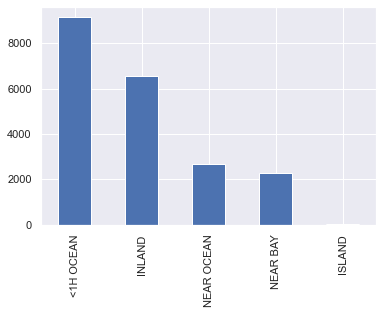

In [128]:
ocean_prox.plot.bar()

* From the bar plot above, houses on the Island are the fewest, and 1H OCEAN houses are the highest

### Getting the relationships between the different features

* Longitude and Latitude

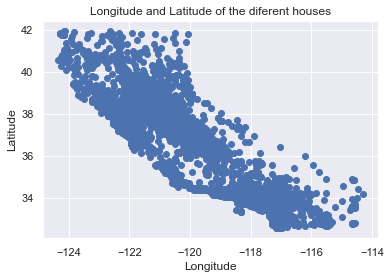

In [129]:
plt.scatter(df.longitude,df.latitude)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Longitude and Latitude of the diferent houses")
plt.show()

* Each point on the scatter plot represents a House

### Relationship between Households and Median_house_value

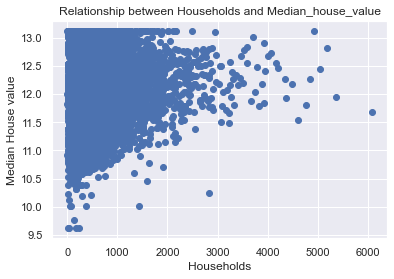

In [130]:
plt.scatter(df.households,np.log(df.median_house_value))
plt.xlabel("Households")
plt.ylabel("Median House value")
plt.title("Relationship between Households and Median_house_value")
plt.show()

* From the scatter plot above, it can be said that the number of most households is below 4000 (Here comes the outliers again)
* Also,when the log of the Housing value is plotted ,there is a linear relationship between Households and House price

### Relationship between Median_house_income and Median_house_value

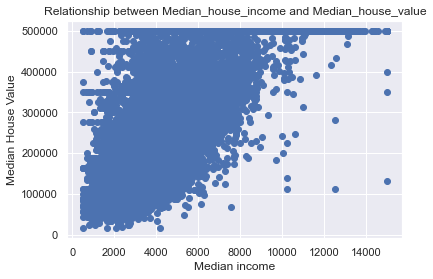

In [131]:
plt.scatter(df.median_income,df.median_house_value)
plt.xlabel("Median income")
plt.ylabel("Median House Value")
plt.title("Relationship between Median_house_income and Median_house_value")
plt.show()

* The higher the income, the higher the House Price

In [132]:
df[df.median_house_value == 500000].count()

longitude             27
latitude              27
housing_median_age    27
total_rooms           27
total_bedrooms        27
population            27
households            27
median_income         27
median_house_value    27
ocean_proximity       27
dtype: int64

* There are 27 houses with House Price == 500000 (this could mean something in the long run)

### Relationship between Total_bedrooms and Median_house_value

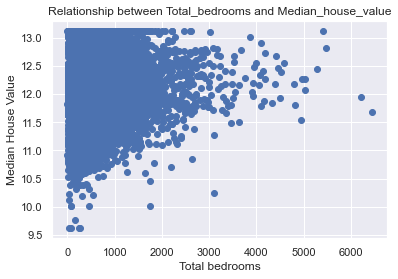

In [133]:
plt.scatter(df.total_bedrooms,np.log(df.median_house_value))
plt.xlabel("Total bedrooms")
plt.ylabel("Median House Value")
plt.title("Relationship between Total_bedrooms and Median_house_value")
plt.show()

* When the total_bedrooms is plotted against the log(Median House value),i discovered that, the higher the number of bedrooms the higher the house value/price

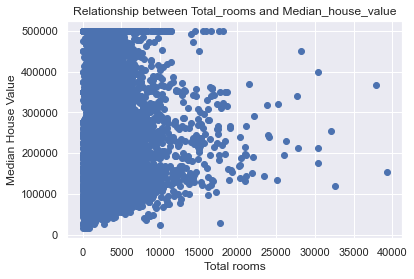

In [134]:
plt.scatter(df.total_rooms,df.median_house_value)
plt.xlabel("Total rooms")
plt.ylabel("Median House Value")
plt.title("Relationship between Total_rooms and Median_house_value")
plt.show()

In [135]:
df1 = df.copy()

In [136]:
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8325.2,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8301.4,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7257.4,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5643.1,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3846.2,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1560.3,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2556.8,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1700.0,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1867.2,84700.0,INLAND


In [137]:
df1.ocean_proximity = df.ocean_proximity.map({'<1H OCEAN':1,'INLAND':2,'NEAR OCEAN':3,'NEAR BAY':4,'ISLAND':5})

### assigning categories to object datatypes

In [138]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
        df[label]=pd.Categorical(content).codes

In [139]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8325.2,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8301.4,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7257.4,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5643.1,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3846.2,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1560.3,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2556.8,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1700.0,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1867.2,84700.0,1


### Modeling

In [140]:
x = df.drop('median_house_value',axis=1)
y = df.median_house_value

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
models = {'RandomForestRegressor':RandomForestRegressor(),
         'LinearRegression':LinearRegression(),
         'DecisionTree':DecisionTreeRegressor()}

def fit_and_score(models,
                 x_train,
                  x_test,
                  y_train,
                  y_test):
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [143]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)

In [144]:
model_scores

{'RandomForestRegressor': 0.8112188346599987,
 'LinearRegression': 0.6137068886499624,
 'DecisionTree': 0.639251292240042}

### Evaluation
* The evaluation metrics used are 
1. Root mean squared log error
2. Mean Absolute Error
3. Mean squared error
4. R2 score

In [150]:
def rmsle(y_test,y_preds):
    
    """calculates the root mean log squared error"""
    
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_scores(model):
    train_preds = model.predict(x_train)
    scores = {'Training MAE': mean_absolute_error(y_train,train_preds),
              'Training Mean_squared_error': mean_squared_error(y_train,train_preds),
             'Training Rmsle': rmsle(y_train,train_preds),
             'Training r2': r2_score(y_train,train_preds)}
    return scores

In [151]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [152]:
show_scores(model)

{'Training MAE': 11926.335574127905,
 'Training Mean_squared_error': 341065747.3191576,
 'Training Rmsle': 0.09747790964278126,
 'Training r2': 0.9744859884525944}

In [153]:
model.score(x_test,y_test)

0.8085492167303256

### Hyper parameter tuning with RandomizedSearchCV

In [171]:
# different hyper parameters for RandomForest

rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth': [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          'max_features': [0.5,1,'sqrt','auto']}

rs_model = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                             param_distributions=rf_grid,
                             cv= 5,
                             n_iter = 30,
                             verbose = True)

rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [172]:
rs_model.best_params_

{'n_estimators': 960,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': None}

In [173]:
show_scores(rs_model)

{'Training MAE': 21317.976479511966,
 'Training Mean_squared_error': 1024632888.1078883,
 'Training Rmsle': 0.15905066901424902,
 'Training r2': 0.9233505693710924}

In [178]:
# rs_model is the model used for hyper parameter tuning
rs_model.score(x_test,y_test)

0.8139596563933902

In [187]:
ideal_model = RandomForestRegressor(n_estimators=960,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   max_depth=None)
ideal_model.fit(x_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=960)

In [188]:
ideal_model.score(x_test,y_test)

0.8135836534234859

* As it stands, the best model is the first model used before hyper parameter tuning, but the model gotten after hyper parameter tuning is giving a better accuracy when tested on the testset
* Ideal_model is the model that contains the best parameters gotten after hyparameter tuning

### Residual plot

In [189]:
y_preds = ideal_model.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

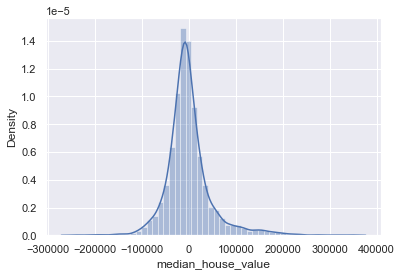

In [190]:
sns.distplot(y_test-y_preds)

In [191]:
y_test=y_test.reset_index(drop = True)
df_preds = pd.DataFrame()
df_preds['Predictions'] = y_preds
df_preds['Targets'] = y_test
df_preds['Residuals'] = y_test - y_preds
df_preds.sort_values(by= ['Residuals'],ascending = False)

,Predictions,Targets,Residuals
1865,151199.538619,500001.0,348801.461381
872,153833.218692,500001.0,346167.781308
1649,176750.874495,500001.0,323250.125505
3693,190115.267593,500001.0,309885.732407
1140,202902.351079,500001.0,297098.648921
...,...,...,...
3423,421721.287034,222700.0,-199021.287034
3029,228298.035322,14999.0,-213299.035322
2927,232898.695065,17500.0,-215398.695065
1250,306575.039638,67500.0,-239075.039638


#### Feature importance
* This is to determine which features are the most important

In [192]:
ideal_model.feature_importances_

array([0.1399431 , 0.12910906, 0.04322855, 0.02653909, 0.02245573,
       0.03418673, 0.01953061, 0.47166325, 0.11334389])

<AxesSubplot:>

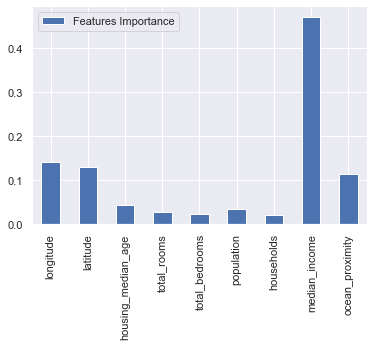

In [194]:
features = pd.DataFrame()
features['Features Importance'] = ideal_model.feature_importances_
features.index = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'ocean_proximity']
features.plot.bar()